In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Step 1 Problem Statement 

# step 2 Data Gathering 

In [2]:
df=pd.read_csv("train.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
df.isna().sum()*100/len(df)

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

# step 3. EDA

## 3.1 Gender

In [6]:
df.Gender.value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

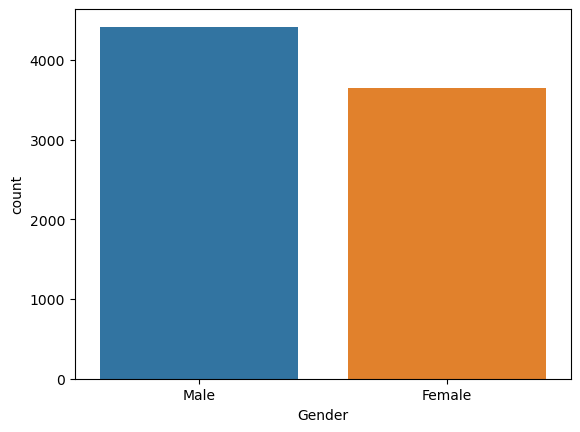

In [7]:
sns.countplot(x=df.Gender)

In [8]:
df.Gender.value_counts().to_dict()

{'Male': 4417, 'Female': 3651}

In [9]:
df.Gender.replace({'Male': 1, 'Female': 0}, inplace=True)

In [10]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

## 3.2 Ever_Married

In [11]:
df.Ever_Married.value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

<Axes: xlabel='Ever_Married', ylabel='count'>

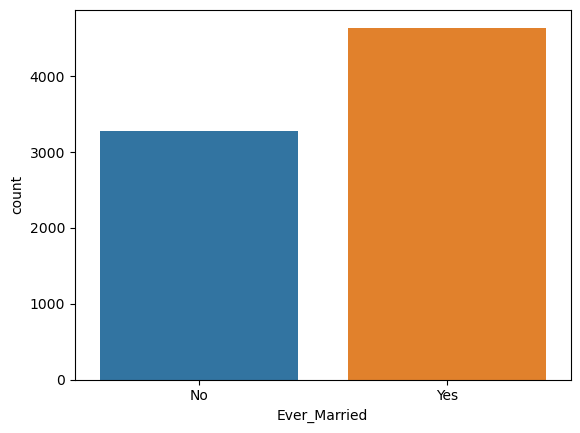

In [12]:
sns.countplot(x=df.Ever_Married)

In [13]:
df.Ever_Married.value_counts().to_dict()

{'Yes': 4643, 'No': 3285}

In [14]:
df.Ever_Married.fillna(df.Ever_Married.mode()[0], inplace=True)

In [15]:
df.Ever_Married.isna().sum()

0

<Axes: xlabel='Ever_Married', ylabel='count'>

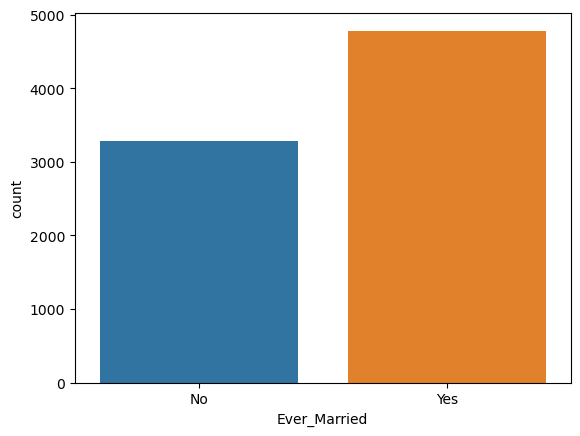

In [16]:
sns.countplot(x=df.Ever_Married)

In [17]:
df.Ever_Married.value_counts().to_dict()

{'Yes': 4783, 'No': 3285}

In [18]:
df.Ever_Married.replace({'Yes': 1, 'No': 0}, inplace=True)

## 3.3 Age

In [19]:
df.Age.nunique()

67

<Axes: xlabel='Age', ylabel='Age'>

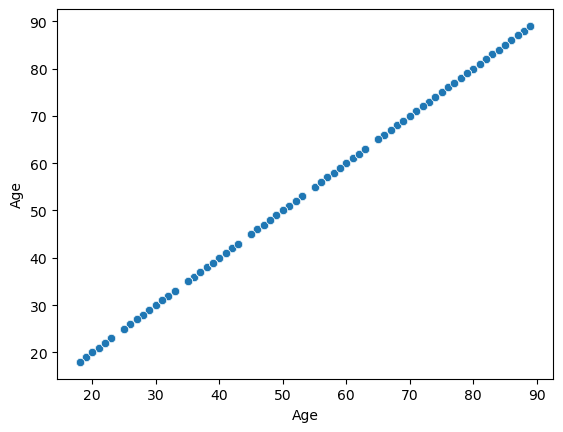

In [20]:
sns.scatterplot(x=df.Age,y=df.Age)

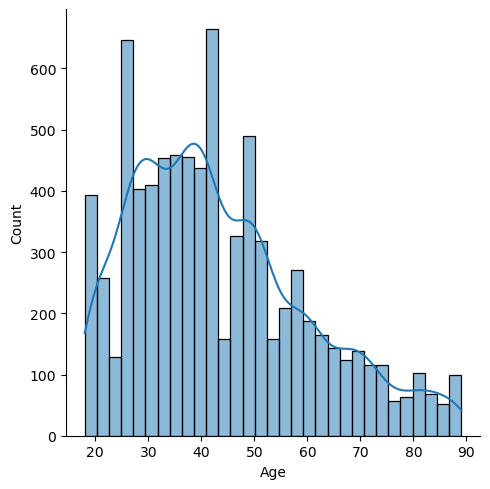

In [21]:
sns.displot(df.Age, kde=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   int64  
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 693.5+ KB


## 3.4 Graduated

In [23]:
df.Graduated.value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [24]:
df.Graduated.isna().sum()

78

In [25]:
df.Graduated.replace({'Yes': 1, 'No': 0}, inplace=True)

In [26]:
df.Graduated.median()

1.0

In [27]:
df.Graduated.fillna(df.Graduated.median(), inplace=True)

<Axes: xlabel='Graduated', ylabel='count'>

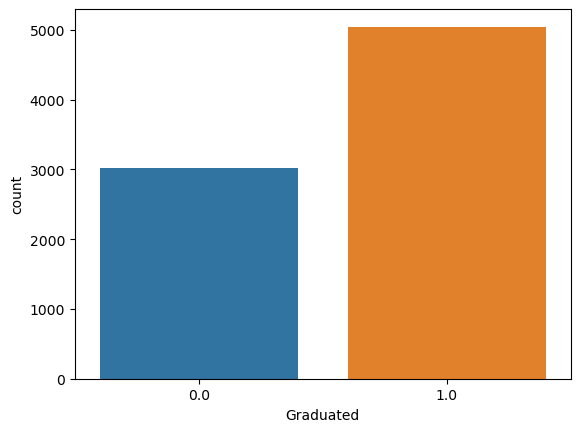

In [28]:
sns.countplot(x=df.Graduated)

### 3.5 Profession

In [29]:
df.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [30]:
df.Profession.isna().sum()

124

In [31]:
df.Profession.fillna("Other", inplace=True)

In [32]:
prof_df=pd.get_dummies(df['Profession'],prefix='prof_', drop_first=True)

In [33]:
prof_df

,prof__Doctor,prof__Engineer,prof__Entertainment,prof__Executive,prof__Healthcare,prof__Homemaker,prof__Lawyer,prof__Marketing,prof__Other
0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0,0,0,0,0,1
8064,0,0,0,1,0,0,0,0,0
8065,0,0,0,0,1,0,0,0,0
8066,0,0,0,0,1,0,0,0,0


## 3.6 Work_Experience

In [34]:
df.Work_Experience.nunique()

15

In [35]:
df.Work_Experience.isna().sum()

829

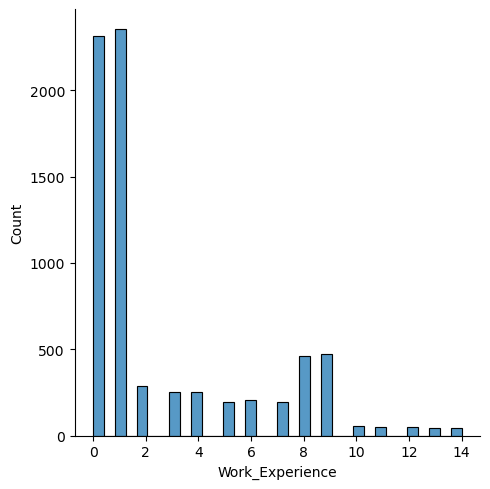

In [36]:
sns.displot(df.Work_Experience)

In [37]:
df.Work_Experience.mean()

2.641663213150988

In [38]:
df.Work_Experience.median()

1.0

In [39]:
df.Work_Experience.mode()[0]

1.0

<Axes: xlabel='Work_Experience', ylabel='Var_1'>

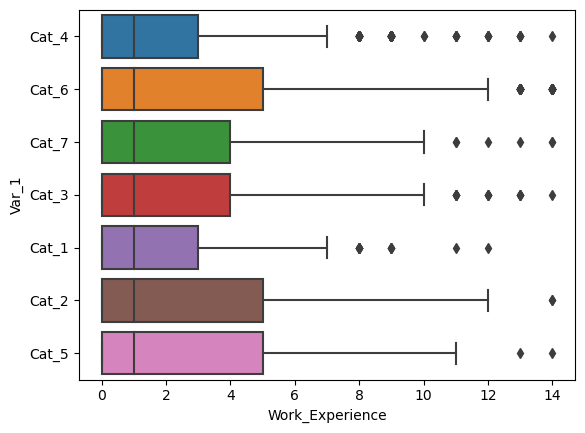

In [40]:
sns.boxplot(x=df.Work_Experience,y=df.Var_1)

In [41]:
df.Work_Experience.fillna(df.Work_Experience.mode()[0], inplace=True)

In [42]:
df.Work_Experience.isna().sum()

0

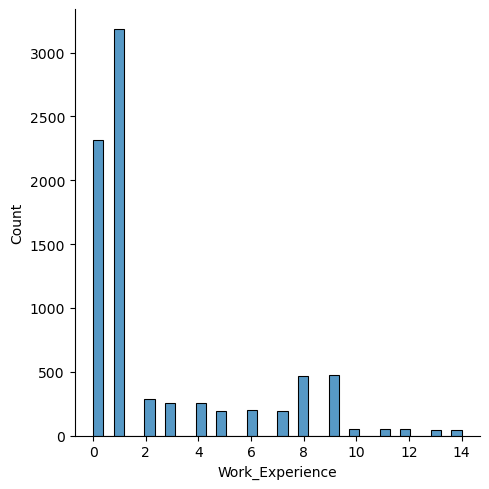

In [43]:
sns.displot(x=df.Work_Experience)

### 3.7 Spending_Score

In [44]:
df.Spending_Score.value_counts().to_dict()

{'Low': 4878, 'Average': 1974, 'High': 1216}

In [45]:
df.Spending_Score.replace({'Low': 0, 'Average': 1, 'High': 2}, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   int64  
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 693.5+ KB


### 3.8 Family_Size

In [47]:
df.Family_Size.value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [48]:
df.Family_Size.isna().sum()

335

In [49]:
df.Family_Size.mean()

2.85012285012285

In [50]:
df.Family_Size.mode()[0]

2.0

In [51]:
df.Family_Size.median()

3.0

<Axes: xlabel='Family_Size', ylabel='count'>

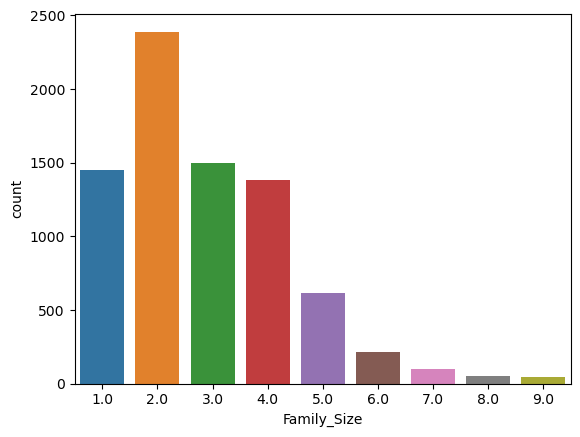

In [52]:
sns.countplot(x=df.Family_Size)

In [53]:
df.Family_Size.fillna(df.Family_Size.median(), inplace=True)

In [54]:
df.isna().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              76
Segmentation        0
dtype: int64

## Var_1

In [55]:
df.Var_1.value_counts().to_dict()

{'Cat_6': 5238,
 'Cat_4': 1089,
 'Cat_3': 822,
 'Cat_2': 422,
 'Cat_7': 203,
 'Cat_1': 133,
 'Cat_5': 85}

<Axes: xlabel='Var_1', ylabel='count'>

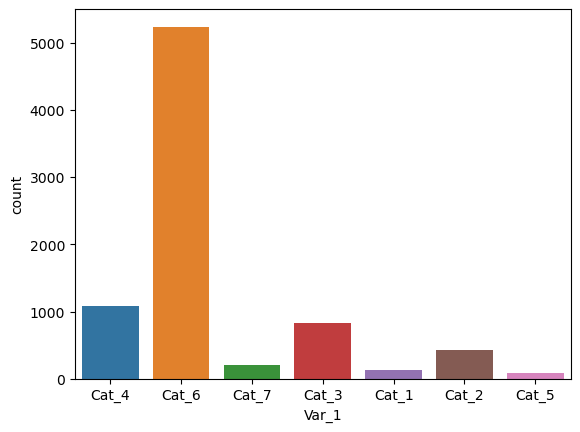

In [56]:
sns.countplot(x=df.Var_1)

In [57]:
df.Var_1.mode()[0]

'Cat_6'

In [58]:
df.dropna(inplace=True, axis=0)

In [59]:
df.Var_1.isna().sum()

0

In [60]:
len(df) + 76

8068

In [61]:
df.Var_1.replace({'Cat_6': 6,
 'Cat_4': 4,
 'Cat_3': 3,
 'Cat_2': 2,
 'Cat_7': 7,
 'Cat_1': 1,
 'Cat_5': 5}, inplace=True)

### 3.9 Segmentation

In [62]:
df.Segmentation.value_counts().to_dict()

{'D': 2245, 'A': 1953, 'C': 1949, 'B': 1845}

In [63]:
df.Segmentation.replace({'D': 3, 'A': 0, 'C': 2, 'B': 1}, inplace=True)

In [64]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0.0,Healthcare,1.0,0,4.0,4,3
1,462643,0,1,38,1.0,Engineer,1.0,1,3.0,4,0
2,466315,0,1,67,1.0,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1.0,Lawyer,0.0,2,2.0,6,1
4,462669,0,1,40,1.0,Entertainment,1.0,2,6.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0.0,Other,0.0,0,7.0,1,3
8064,464685,1,0,35,0.0,Executive,3.0,0,4.0,4,3
8065,465406,0,0,33,1.0,Healthcare,1.0,0,1.0,6,3
8066,467299,0,0,27,1.0,Healthcare,1.0,0,4.0,6,1


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
final_df=pd.concat([df,prof_df],axis=1)

In [67]:
final_df.dropna(inplace=True)

In [68]:
final_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof__Doctor,prof__Engineer,prof__Entertainment,prof__Executive,prof__Healthcare,prof__Homemaker,prof__Lawyer,prof__Marketing,prof__Other
0,462809.0,1.0,0.0,22.0,0.0,Healthcare,1.0,0.0,4.0,4.0,3.0,0,0,0,0,1,0,0,0,0
1,462643.0,0.0,1.0,38.0,1.0,Engineer,1.0,1.0,3.0,4.0,0.0,0,1,0,0,0,0,0,0,0
2,466315.0,0.0,1.0,67.0,1.0,Engineer,1.0,0.0,1.0,6.0,1.0,0,1,0,0,0,0,0,0,0
3,461735.0,1.0,1.0,67.0,1.0,Lawyer,0.0,2.0,2.0,6.0,1.0,0,0,0,0,0,0,1,0,0
4,462669.0,0.0,1.0,40.0,1.0,Entertainment,1.0,2.0,6.0,6.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018.0,1.0,0.0,22.0,0.0,Other,0.0,0.0,7.0,1.0,3.0,0,0,0,0,0,0,0,0,1
8064,464685.0,1.0,0.0,35.0,0.0,Executive,3.0,0.0,4.0,4.0,3.0,0,0,0,1,0,0,0,0,0
8065,465406.0,0.0,0.0,33.0,1.0,Healthcare,1.0,0.0,1.0,6.0,3.0,0,0,0,0,1,0,0,0,0
8066,467299.0,0.0,0.0,27.0,1.0,Healthcare,1.0,0.0,4.0,6.0,1.0,0,0,0,0,1,0,0,0,0


In [95]:
x_df=final_df.drop(['Segmentation','ID','Profession'], axis=1)

In [96]:
y_df=final_df['Segmentation']

In [97]:
y_df.value_counts()

3.0    2245
0.0    1953
2.0    1949
1.0    1845
Name: Segmentation, dtype: int64

<Axes: xlabel='Segmentation', ylabel='count'>

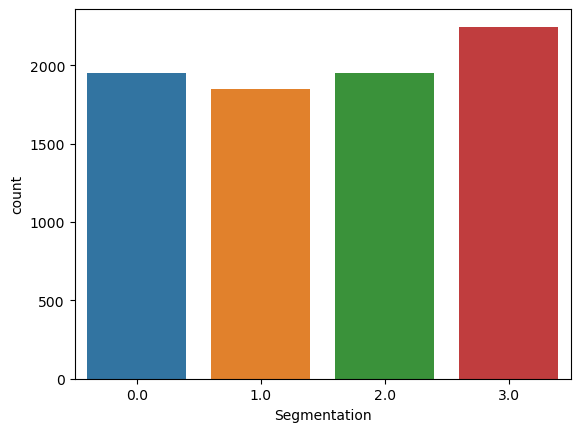

In [98]:
sns.countplot(x=final_df['Segmentation'])

# Step 6 Model 

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train,y_test= train_test_split(x_df,y_df, test_size=0.20, random_state=42, stratify=y_df)

In [101]:
x_train.shape

(6393, 17)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
model= LogisticRegression(max_iter=150, multi_class='ovr')
model.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150, multi_class='ovr')

In [104]:

from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, precision_score, recall_score, classification_report


In [105]:
#### Traning Data Evaluation

y_pred_train = model.predict(x_train)
# y_pred_train

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print(f'{cnf_matrix}')

print("*"*50)

clf_report= classification_report(y_train, y_pred_train)
print(clf_report)

print("*"*50)
acc=accuracy_score(y_train, y_pred_train)
print(f"acc={acc}")

[[ 732  141  348  341]
 [ 459  238  608  171]
 [ 216  106 1022  215]
 [ 341   78  112 1265]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.42      0.47      0.44      1562
         1.0       0.42      0.16      0.23      1476
         2.0       0.49      0.66      0.56      1559
         3.0       0.64      0.70      0.67      1796

    accuracy                           0.51      6393
   macro avg       0.49      0.50      0.48      6393
weighted avg       0.50      0.51      0.49      6393

**************************************************
acc=0.5094634756765212


In [106]:
m_con_matrix=multilabel_confusion_matrix(y_train, y_pred_train)
print(m_con_matrix)

[[[3815 1016]
  [ 830  732]]

 [[4592  325]
  [1238  238]]

 [[3766 1068]
  [ 537 1022]]

 [[3870  727]
  [ 531 1265]]]


In [107]:
#### Testing  Data Evaluation

y_pred_test = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(f'{cnf_matrix}')

print("*"*50)

clf_report= classification_report(y_test, y_pred_test)
print(clf_report)

print("*"*50)
acc=accuracy_score(y_test, y_pred_test)
print(f"acc={acc}")

[[176  40 104  71]
 [114  43 165  47]
 [ 60  29 248  53]
 [ 82   7  34 326]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.41      0.45      0.43       391
         1.0       0.36      0.12      0.18       369
         2.0       0.45      0.64      0.53       390
         3.0       0.66      0.73      0.69       449

    accuracy                           0.50      1599
   macro avg       0.47      0.48      0.46      1599
weighted avg       0.48      0.50      0.47      1599

**************************************************
acc=0.4959349593495935


# Model 2 

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
#### Traning Data Evaluation

y_pred_train = model.predict(x_train)
# y_pred_train

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print(f'{cnf_matrix}')

print("*"*50)

clf_report= classification_report(y_train, y_pred_train)
print(clf_report)

print("*"*50)
acc=accuracy_score(y_train, y_pred_train)
print(f"acc={acc}")

[[1545    8    8    1]
 [  62 1392   21    1]
 [  38   72 1447    2]
 [  23   11   23 1739]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1562
         1.0       0.94      0.94      0.94      1476
         2.0       0.97      0.93      0.95      1559
         3.0       1.00      0.97      0.98      1796

    accuracy                           0.96      6393
   macro avg       0.96      0.96      0.96      6393
weighted avg       0.96      0.96      0.96      6393

**************************************************
acc=0.9577663068981699


In [115]:
#### Testing  Data Evaluation

y_pred_test = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(f'{cnf_matrix}')

print("*"*50)

clf_report= classification_report(y_test, y_pred_test)
print(clf_report)

print("*"*50)
acc=accuracy_score(y_test, y_pred_test)
print(f"acc={acc}")

[[141 104  64  82]
 [ 95 125  95  54]
 [ 62 109 177  42]
 [ 96  55  47 251]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.36      0.36      0.36       391
         1.0       0.32      0.34      0.33       369
         2.0       0.46      0.45      0.46       390
         3.0       0.59      0.56      0.57       449

    accuracy                           0.43      1599
   macro avg       0.43      0.43      0.43      1599
weighted avg       0.44      0.43      0.44      1599

**************************************************
acc=0.434021263289556


In [116]:
def evelution(model):
    #### Traning Data Evaluation

    y_pred_train = model.predict(x_train)
    # y_pred_train

    cnf_matrix = confusion_matrix(y_train, y_pred_train)
    print(f'{cnf_matrix}')

    print("*"*50)

    clf_report= classification_report(y_train, y_pred_train)
    print(clf_report)

    print("*"*50)
    acc=accuracy_score(y_train, y_pred_train)
    print(f"acc={acc}")
    
    #### Testing  Data Evaluation

    y_pred_test = model.predict(x_test)

    cnf_matrix = confusion_matrix(y_test, y_pred_test)
    print(f'{cnf_matrix}')

    print("*"*50)

    clf_report= classification_report(y_test, y_pred_test)
    print(clf_report)

    print("*"*50)
    acc=accuracy_score(y_test, y_pred_test)
    print(f"acc={acc}")
    

## model 3

In [117]:
model= RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [118]:
evelution(model)

[[1486   37   29   10]
 [  30 1375   63    8]
 [  15   34 1499   11]
 [  13    5   15 1763]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1562
         1.0       0.95      0.93      0.94      1476
         2.0       0.93      0.96      0.95      1559
         3.0       0.98      0.98      0.98      1796

    accuracy                           0.96      6393
   macro avg       0.96      0.96      0.96      6393
weighted avg       0.96      0.96      0.96      6393

**************************************************
acc=0.9577663068981699
[[155  91  59  86]
 [ 97 115 106  51]
 [ 53  87 196  54]
 [ 90  26  36 297]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.39      0.40      0.39       391
         1.0       0.36      0.31      0.33       369
         2.0       0.49      0.50      0.50       390
  

In [121]:
from xgboost import XGBClassifier

In [122]:
model= XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [123]:
evelution(model)

[[1182  148  126  106]
 [ 164  965  260   87]
 [ 100  110 1241  108]
 [ 130   49   34 1583]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      1562
         1.0       0.76      0.65      0.70      1476
         2.0       0.75      0.80      0.77      1559
         3.0       0.84      0.88      0.86      1796

    accuracy                           0.78      6393
   macro avg       0.77      0.77      0.77      6393
weighted avg       0.78      0.78      0.78      6393

**************************************************
acc=0.7775692163303614
[[151 101  57  82]
 [ 82 116 119  52]
 [ 41  81 217  51]
 [ 89  31  25 304]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.42      0.39      0.40       391
         1.0       0.35      0.31      0.33       369
         2.0       0.52      0.56      0.54       390
  

In [124]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [125]:
pip install pandas_profiling

     ---------------------------------------- 0.0/262.6 kB ? eta -:--:--
     ----------------------------- -------- 204.8/262.6 kB 6.1 MB/s eta 0:00:01
     -------------------------------------- 262.6/262.6 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/309.8 kB ? eta -:--:--
     -------------------------------------- 309.8/309.8 kB 6.4 MB/s eta 0:00:00
  Obtaining dependency information for pydantic>=1.8.1 from https://files.pythonhosted.org/packages/82/06/fafdc75e48b248eff364b4249af4bcc6952225e8f20e8205820afc66e88e/pydantic-2.3.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/148.8 kB ? eta -:--:--
     -------------------------------------- 148.8/148.8 kB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/102.4 kB ? eta -:--:--
     ---------------------------------------- 102.4/102.4 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.


# Rought

## Smote > Synthetic Minority Oversampling Technique

In [82]:
# pip install imbalanced-learn

In [83]:
# conda install -c conda-forge imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE

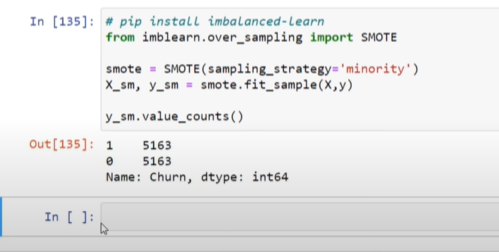

In [85]:
final_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof__Doctor,prof__Engineer,prof__Entertainment,prof__Executive,prof__Healthcare,prof__Homemaker,prof__Lawyer,prof__Marketing,prof__Other
0,462809.0,1.0,0.0,22.0,0.0,Healthcare,1.0,0.0,4.0,4.0,3.0,0,0,0,0,1,0,0,0,0
1,462643.0,0.0,1.0,38.0,1.0,Engineer,1.0,1.0,3.0,4.0,0.0,0,1,0,0,0,0,0,0,0
2,466315.0,0.0,1.0,67.0,1.0,Engineer,1.0,0.0,1.0,6.0,1.0,0,1,0,0,0,0,0,0,0
3,461735.0,1.0,1.0,67.0,1.0,Lawyer,0.0,2.0,2.0,6.0,1.0,0,0,0,0,0,0,1,0,0
4,462669.0,0.0,1.0,40.0,1.0,Entertainment,1.0,2.0,6.0,6.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018.0,1.0,0.0,22.0,0.0,Other,0.0,0.0,7.0,1.0,3.0,0,0,0,0,0,0,0,0,1
8064,464685.0,1.0,0.0,35.0,0.0,Executive,3.0,0.0,4.0,4.0,3.0,0,0,0,1,0,0,0,0,0
8065,465406.0,0.0,0.0,33.0,1.0,Healthcare,1.0,0.0,1.0,6.0,3.0,0,0,0,0,1,0,0,0,0
8066,467299.0,0.0,0.0,27.0,1.0,Healthcare,1.0,0.0,4.0,6.0,1.0,0,0,0,0,1,0,0,0,0


In [86]:
x_df=final_df.drop(['Var_1','ID','Profession'], axis=1)

In [87]:
y_df=final_df['Var_1']

In [88]:
x_df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,prof__Doctor,prof__Engineer,prof__Entertainment,prof__Executive,prof__Healthcare,prof__Homemaker,prof__Lawyer,prof__Marketing,prof__Other
0,1.0,0.0,22.0,0.0,1.0,0.0,4.0,3.0,0,0,0,0,1,0,0,0,0
1,0.0,1.0,38.0,1.0,1.0,1.0,3.0,0.0,0,1,0,0,0,0,0,0,0
2,0.0,1.0,67.0,1.0,1.0,0.0,1.0,1.0,0,1,0,0,0,0,0,0,0
3,1.0,1.0,67.0,1.0,0.0,2.0,2.0,1.0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,40.0,1.0,1.0,2.0,6.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1.0,0.0,22.0,0.0,0.0,0.0,7.0,3.0,0,0,0,0,0,0,0,0,1
8064,1.0,0.0,35.0,0.0,3.0,0.0,4.0,3.0,0,0,0,1,0,0,0,0,0
8065,0.0,0.0,33.0,1.0,1.0,0.0,1.0,3.0,0,0,0,0,1,0,0,0,0
8066,0.0,0.0,27.0,1.0,1.0,0.0,4.0,1.0,0,0,0,0,1,0,0,0,0


In [89]:
y_df

0       4.0
1       4.0
2       6.0
3       6.0
4       6.0
       ... 
8063    1.0
8064    4.0
8065    6.0
8066    6.0
8067    4.0
Name: Var_1, Length: 7992, dtype: float64

In [90]:
# this is for 2 class balance only ( 0 and 1 class balance)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_df, y_df)


In [91]:
 y_sm.value_counts()

6.0    5238
5.0    5238
4.0    1089
3.0     822
2.0     422
7.0     203
1.0     133
Name: Var_1, dtype: int64

In [92]:
x_sm

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,prof__Doctor,prof__Engineer,prof__Entertainment,prof__Executive,prof__Healthcare,prof__Homemaker,prof__Lawyer,prof__Marketing,prof__Other
0,1.000000,0.000000,22.000000,0.000000,1.000000,0.000000,4.000000,3.000000,0,0,0,0,1,0,0,0,0
1,0.000000,1.000000,38.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0,1,0,0,0,0,0,0,0
2,0.000000,1.000000,67.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0,1,0,0,0,0,0,0,0
3,1.000000,1.000000,67.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0,0,0,0,0,0,1,0,0
4,0.000000,1.000000,40.000000,1.000000,1.000000,2.000000,6.000000,0.000000,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13140,0.312888,0.687112,31.687112,0.687112,0.625776,0.000000,2.687112,0.687112,0,0,0,0,0,0,0,0,0
13141,1.000000,1.000000,50.190204,0.603265,0.603265,1.603265,4.603265,1.603265,0,0,0,0,0,0,0,0,0
13142,1.000000,1.000000,48.000000,1.000000,0.811581,1.000000,2.162316,1.837684,0,0,0,0,0,0,0,0,0
13143,0.427531,0.427531,41.144938,0.000000,0.427531,0.427531,1.427531,2.572469,0,0,0,0,0,0,0,0,0


### Multiclass SMOTE

In [93]:
# {'Cat_6': 5238,
#  'Cat_4': 1089,
#  'Cat_3': 822,
#  'Cat_2': 422,
#  'Cat_7': 203,
#  'Cat_1': 133, 
#  'Cat_5': 85}

# weightage_6=(5238)/len(final_df)
# weightage_4=(1089)/len(final_df)
# weightage_3=(822)/len(final_df)
# weightage_2=(422)/len(final_df)
# weightage_7=(203)/len(final_df)
# weightage_1=(133)/len(final_df)
# weightage_5=(85)/len(final_df)
# print(f'weightage_1: {weightage_1}')
# print(f'weightage_2: {weightage_2}')
# print(f'weightage_3: {weightage_3}')
# print(f'weightage_4: {weightage_4}')
# print(f'weightage_5: {weightage_5}')
# print(f'weightage_6: {weightage_6}')
# print(f'weightage_7: {weightage_7}')

In [94]:
# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification

# # Create a synthetic multiclass dataset for demonstration purposes
# X, Y = make_classification(n_classes=6, weights=[0.017, 0.053, 0.103, 0.137, 0.0107, 0.656], n_samples=10000, random_state=42, n_clusters_per_class=1, n_informative=6)

# # Instantiate the Multiclass SMOTE object
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply Multiclass SMOTE to the dataset
# X_resampled, Y_resampled = smote.fit_resample(X, Y)

# # Print the class distribution before and after SMOTE
# print("Class distribution before SMOTE:")
# print(pd.Series(Y).value_counts())  # Use pd.Series to count class frequencies
# print("\nClass distribution after SMOTE:")
# print(pd.Series(Y_resampled).value_counts())  # Use pd.Series to count class frequencies
